### Building an Image Classifier


First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras
from medmnist import PathMNIST
import matplotlib.pyplot as plt
import numpy as np

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
train_dataset = PathMNIST(split="train", download=True)
val_dataset = PathMNIST(split="val", download=True)
test_dataset = PathMNIST(split="test", download=True)

X_train = train_dataset.imgs
y_train = train_dataset.labels

X_val = val_dataset.imgs
y_val = val_dataset.labels

X_test = test_dataset.imgs
y_test = test_dataset.labels

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


The training set contains 89999 images, each 28x28 pixels with 3 color channels

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(89996, 28, 28, 3)
(10004, 28, 28, 3)
(7180, 28, 28, 3)


Corresponding class names

In [6]:
class_names = ["adipose", "background", "debris", "lymphocytes", "mucus",
               "smooth muscle", "normal colon mucosa", "cancer-associated stroma", "colorectal adenocarcinoma epithelium"]

Let's take a look at a sample of the images in the dataset:

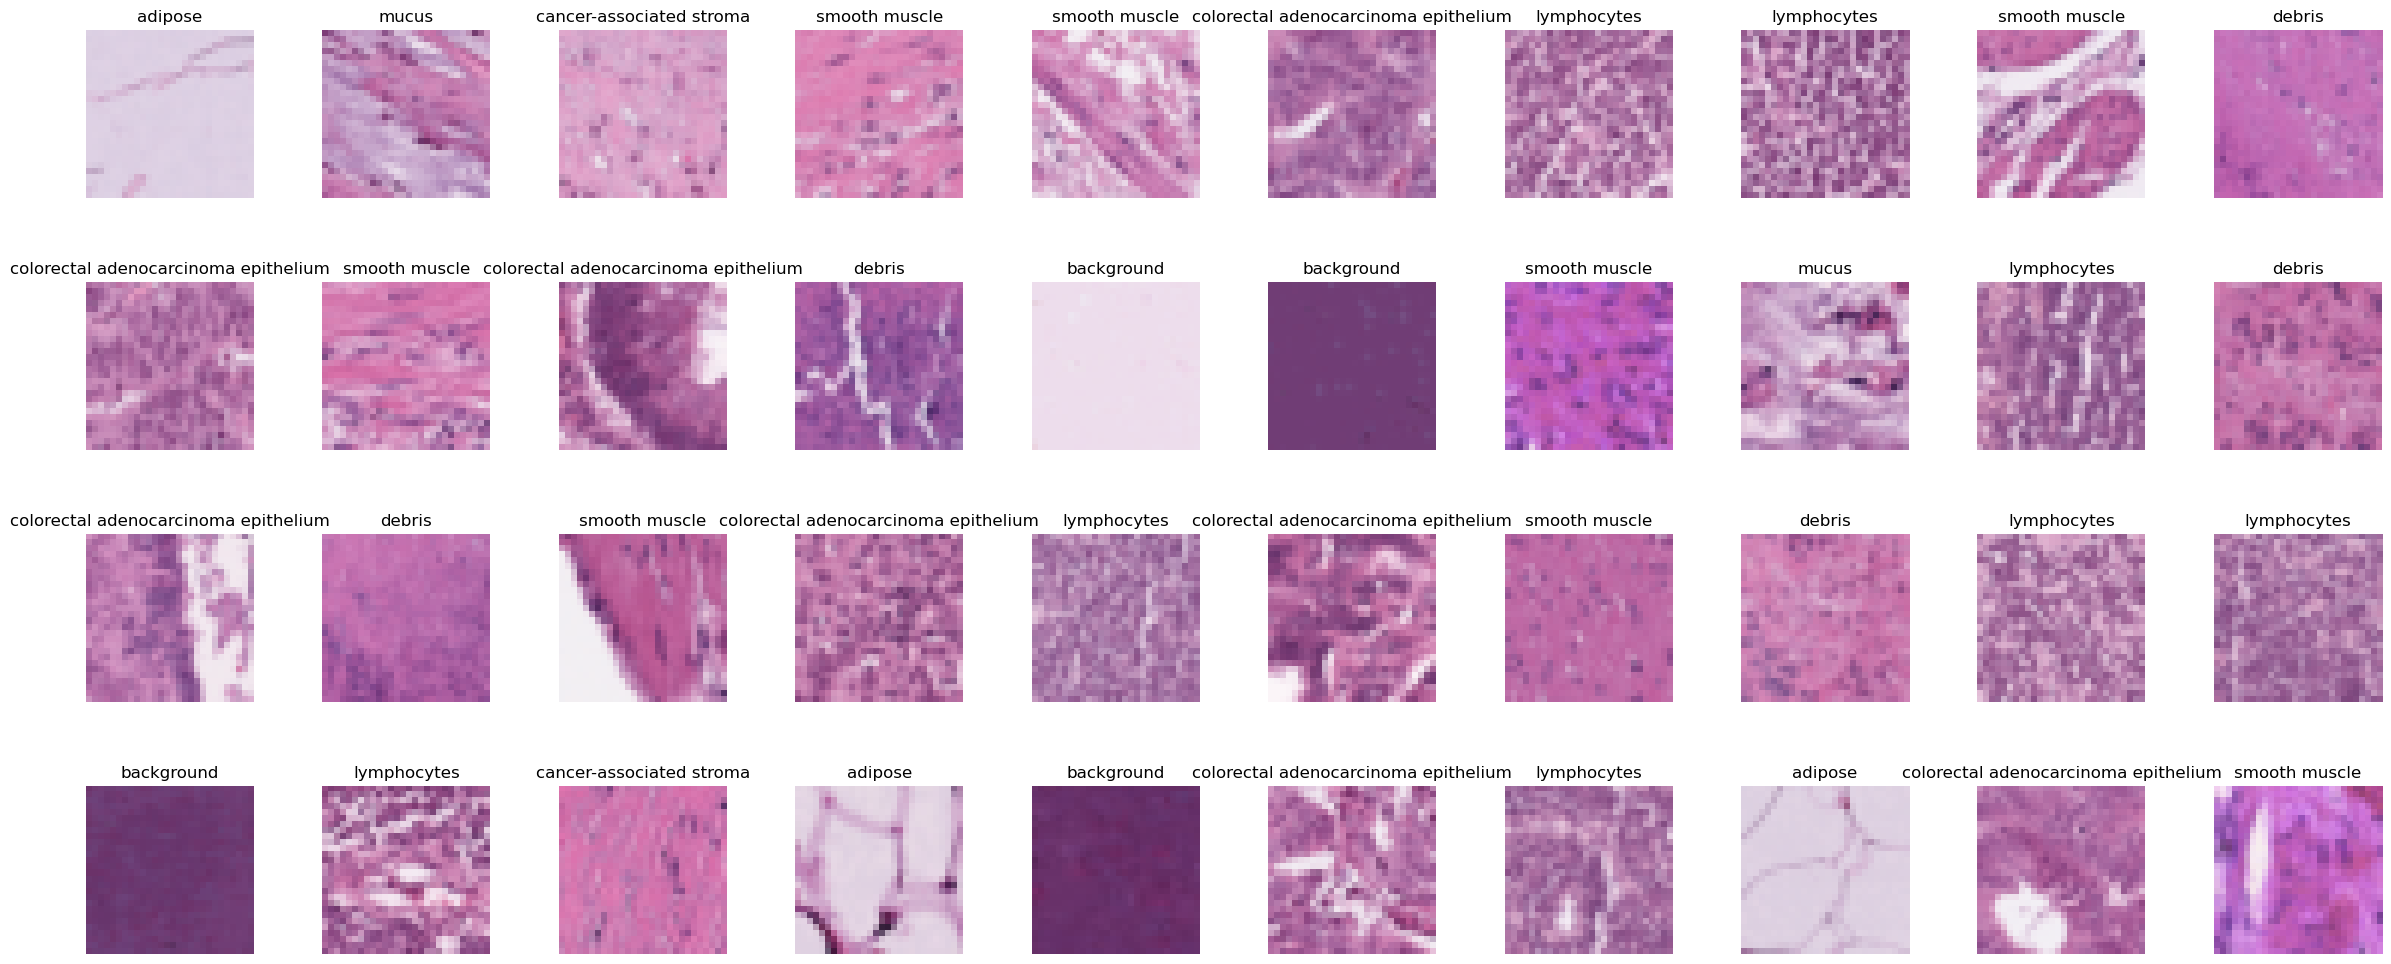

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.



In [8]:
X_train = X_train/255.
X_val = X_val/255.
X_test = X_test/255.

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28, 3]))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(9, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 120)               282360    
                                                                 
 dense_1 (Dense)             (None, 9)                 1089      
                                                                 
Total params: 283,449
Trainable params: 283,449
Non-trainable params: 0
_________________________________________________________________


In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [13]:
# Set threading parameters
tf.config.threading.set_inter_op_parallelism_threads(2)
tf.config.threading.set_intra_op_parallelism_threads(2)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

: 